MACHINE LEARNING (LINEAR REGRESSION) CAPSTONE PROJECT


---



---



Context:

* In urban areas, taxis are a popular mode of transportation for people traveling short to medium distances. However, estimating the fare for a taxi ride can sometimes be challenging, as it depends on various factors such as distance, traffic conditions, time of day, and number of passengers. Developing an accurate fare prediction model can benefit both passengers and taxi service providers by providing transparency and helping passengers plan their trips more effectively.


---



---



Problem Statement:

* The goal of this project is to develop a machine learning model that can predict the fare amount of a taxi ride based on the pickup and dropoff locations, pickup datetime, and number of passengers. This model aims to provide an accurate estimate of the fare, helping passengers plan their travel budget and enabling taxi service providers to streamline their pricing strategies.


---


---


Real-Life Scenario:

* Your company wants to improve the accuracy of fare estimates provided to customers booking rides through their app. By developing a machine learning model based on historical ride data, you can help the company provide more transparent and reliable fare estimates, leading to better customer satisfaction and increased trust in the service.


---



---


Data Dictionary:

* pickup_datetime: The date and time when the taxi ride started. This can help capture factors such as peak travel times and seasonal variations in fare prices.

* fare_amount: The fare amount for the taxi ride. This is the target variable that the model aims to predict.

* fare_class: A binary variable indicating whether the fare is above a certain threshold. This can be used to classify fares into different price categories.

* pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude: The coordinates of the pickup and dropoff locations. These can help estimate the distance traveled and account for variations in fare prices based on location.

* passenger_count: The number of passengers in the taxi ride. This can influence the fare amount, as larger groups may require larger vehicles or incur additional charges.


---



---

In [2]:
# Connecting colab with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import scipy.stats as stats
import pylab
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from geopy.distance import geodesic

In [4]:
# Reading the input data file
data=pd.read_csv('/content/drive/MyDrive/NYCTaxiFares.csv')

In [5]:
# let us make another copy of data
df = data.copy()

# Let's Understand the Data

In [6]:
#checking the shape of data
df.shape

(120000, 8)

In [7]:
# Checking the column names
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [8]:
# Checking the head of data
df.head(10)

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1
5,2010-04-22 08:39:47 UTC,8.1,0,-73.980481,40.748995,-73.983508,40.766459,1
6,2010-04-23 19:27:00 UTC,4.9,0,-73.959535,40.779582,-73.947185,40.780223,1
7,2010-04-15 09:03:37 UTC,4.9,0,-74.002601,40.739419,-73.997912,40.730292,1
8,2010-04-20 08:58:00 UTC,2.9,0,-74.014005,40.704058,-74.013202,40.702877,1
9,2010-04-16 18:50:16 UTC,6.1,0,-73.977689,40.784175,-73.988639,40.778669,1


In [9]:
# Checking the tail of data
df.tail()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1
119999,2010-04-17 16:00:14 UTC,5.3,0,-73.955415,40.771920,-73.967623,40.763015,3


In [10]:
# Checking Info of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        119968 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


Observations:

* The DataFrame has 8 columns and 120000 entries (rows)

* There are missing values (nulls) in one of the columns.

* There are 1 object variable, 7 numeric independent variable of which 5 are float and 2 are int.

* The DataFrame consumes approximately 7.3+ MB of memory.

In [11]:
# Checking Stats of Data
df.describe(include='all')

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,120000,119968.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
unique,120000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2010-04-19 08:17:56 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.040854,0.333333,-73.976626,40.751443,-73.974501,40.751695,1.346125
std,NaN,7.500850,0.471406,0.031497,0.025821,0.032419,0.030279,0.760424
min,NaN,2.500000,0.000000,-74.465447,40.121653,-74.443323,40.164927,0.000000
25%,NaN,5.700000,0.000000,-73.992386,40.736594,-73.991478,40.735914,1.000000
50%,NaN,7.700000,0.000000,-73.982084,40.753661,-73.980411,40.754441,1.000000
75%,NaN,11.300000,1.000000,-73.968710,40.768020,-73.965500,40.768880,1.000000


Observation:

* All data is from year 2011, month 'April'.

* The mean fare amount is around 10.04 dollors, with a standard deviation of approximately 7.50 dollors.
* The minimum fare amount is 2.50 dollors, and the maximum fare amount is $ 49.90 dollors.

* The mean fare class is approximately 0.33, indicating that about one-third of the fares are classified as 1.
* The minimum fare class is 0, and the maximum fare class is 1.

* The mean number of passengers is approximately 1.34, indicating that, on average, there are about 1 to 2 passengers per ride.
* The minimum number of passengers is 1, and the maximum number of passengers is 5.

In [12]:
#  Checking for missing values
df.isna().sum()

pickup_datetime       0
fare_amount          32
fare_class            0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
dtype: int64

Observations:

* There are missing values in 'fare_amount' column.


In [13]:
#  Checking for duplicate values
df.duplicated().sum()

0

Observations:

* There are no Duplicate values

In [14]:
# Checking for unique values and their counts of 'passenger_count' column
df.passenger_count.value_counts()

1    92406
2    18650
3     4874
4     2518
5     1427
0      125
Name: passenger_count, dtype: int64

Observation:

* After seeing the unique values, there can't be fare_amount if passengers are 0. Means record having 0 passenger_count can be treated as missing values.

# **FEATURE ENGINEERING**

In [15]:
# Replacing missing values of column 'fare_amount' column with median.
median_value = df['fare_amount'].median()
df['fare_amount'] = df['fare_amount'].fillna(median_value)

In [16]:
df['fare_amount'].isna().sum()

0

In [17]:
# Replacing the record values having 0 to mode of 'passenger_count' column.
mode_value = df['passenger_count'].mode()[0]
df['passenger_count'] = df['passenger_count'].replace(0, mode_value)

In [18]:
df.passenger_count.value_counts()

1    92531
2    18650
3     4874
4     2518
5     1427
Name: passenger_count, dtype: int64

In [19]:
# Converting data type of column pickup_datetime from 'oject' to 'date_time'
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

Now lets do ***Feature Extraction*** and make new variables from one variable 'pickup_datetime'

In [20]:
# Creating new feature 'hour' which will help to understand at what hours there is peak demand on No.of Rides.
df['hour'] = df['pickup_datetime'].dt.hour

In [21]:
# Creating new feature 'day_of_week' which will help to understand that on which days of week  there is peak demand on No.of Rides.
df['day_of_week'] = df['pickup_datetime'].dt.day_name()

In [22]:
# Creating new feature 'day_type' which will help to understand that there is High demand of rides on Weekdays or Weekends.
df['day_type'] = df['pickup_datetime'].dt.dayofweek.apply(lambda x: 'weekday' if x < 5 else 'weekend')

In [23]:
# Dropping the 'pickup_datetime' column as we have extracted all the required data.
df = df.drop(['pickup_datetime'], axis=1)

In [24]:
# Checking for missing values after creating new columns.
df.isna().sum()

fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day_of_week          0
day_type             0
dtype: int64

In [25]:
# Checking for duplicate values after creating new columns.
df.duplicated().sum()

0

Extracting Distances by help of pickup and dropoff Coordinates which may help to understand the distance traveled during a taxi ride. This can be useful in predicting the fare amount, as fares are often based on the distance traveled.

In [26]:
def dist_vincenty(row):
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup_coords, dropoff_coords).kilometers

df['distance'] = df.apply(dist_vincenty, axis=1)

In [27]:
# Dropping the 'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude' column as we have extracted all the required data.
df = df.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'], axis=1)

# Checking Statistical Summary on Final Columns

In [28]:
df.shape

(120000, 7)

In [29]:
df.head()

,fare_amount,fare_class,passenger_count,hour,day_of_week,day_type,distance
0,6.5,0,1,8,Monday,weekday,2.127192
1,6.9,0,1,15,Saturday,weekend,1.395425
2,10.1,1,2,11,Saturday,weekend,3.331977
3,8.9,0,1,21,Sunday,weekend,1.867152
4,19.7,1,1,2,Saturday,weekend,7.249240


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      120000 non-null  float64
 1   fare_class       120000 non-null  int64  
 2   passenger_count  120000 non-null  int64  
 3   hour             120000 non-null  int64  
 4   day_of_week      120000 non-null  object 
 5   day_type         120000 non-null  object 
 6   distance         120000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 6.4+ MB


In [31]:
df.describe(include='all')

,fare_amount,fare_class,passenger_count,hour,day_of_week,day_type,distance
count,120000.000000,120000.000000,120000.000000,120000.000000,120000,120000,120000.000000
unique,NaN,NaN,NaN,NaN,7,2,NaN
top,NaN,NaN,NaN,NaN,Friday,weekday,NaN
freq,NaN,NaN,NaN,NaN,18630,86202,NaN
mean,10.040229,0.333333,1.347167,13.246642,NaN,NaN,3.322940
std,7.499947,0.471406,0.759263,6.553962,NaN,NaN,3.339517
min,2.500000,0.000000,1.000000,0.000000,NaN,NaN,0.010195
25%,5.700000,0.000000,1.000000,9.000000,NaN,NaN,1.316440
50%,7.700000,0.000000,1.000000,14.000000,NaN,NaN,2.237161
75%,11.300000,1.000000,1.000000,19.000000,NaN,NaN,4.033670


Observations:

* The rides occur between 0 and 23 hours. The most common hour appears to be 19:00 (7:00 PM).

* The most common day of the week for rides is Friday.

* Approximately 71.8% of rides occur on weekdays.

* Most rides occur during the day approximately 76% rather than at night.

* The average distance traveled is approximately 3.32 kilometers.The distances range from 0.01 to 28.82 kilometers.

# EXPLORATORY DATA ANALYSIS

* Lets see Numerical values.

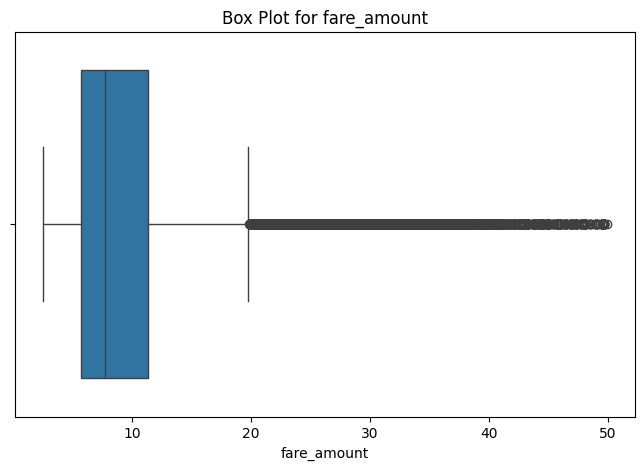

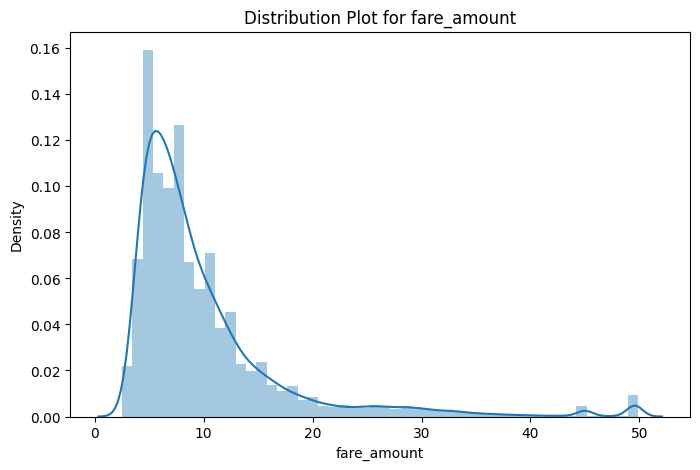

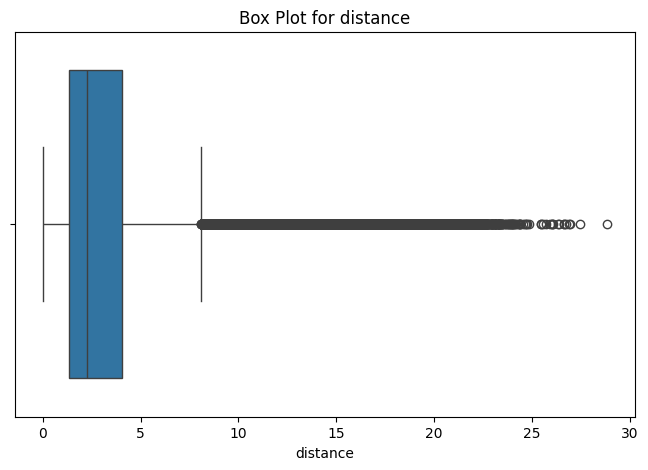

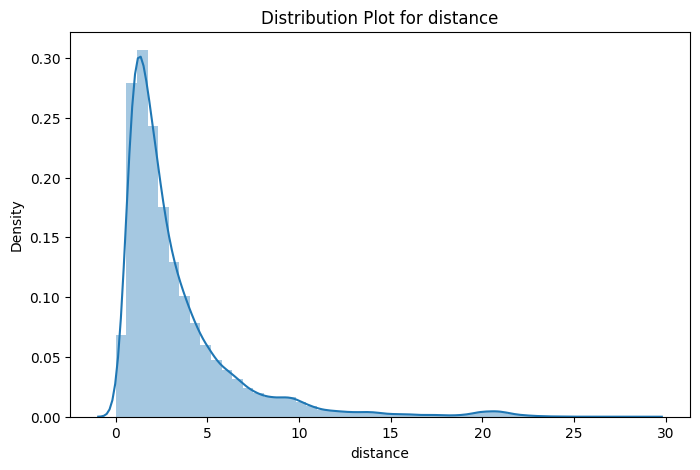

In [32]:
# List of columns to be plotted
columns_to_plot = ['fare_amount','distance']

# Iterate over each column and create box plots and distribution plots
for column in columns_to_plot:

    # Box Plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

    # Distribution Plot
    plt.figure(figsize=(8, 5))
    sns.distplot(df[column],kde='True')
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel(column)
    plt.show()


Observations of 'fare_amount' column:

* The distribution is skewed to the right, meaning there are more fares on the lower end of the price.

* The most common fare price falls between 10 dollors and 20 dollors.
* There are a few outliers on the higher end, likely representing longer or more expensive fares.

Observation of 'distance' column:

* The distribution is skewed to the right, meaning most trips are shorter distances.

* The most frequent trip distance is between 0 to 5 kms.
* There are a few outliers on the higher end, likely representing much longer trips.

# Lets Normalize the Data

In [33]:
#  Code for histogram and Q-Q plot:

def plot_data(df, feature):
 # Set up a 1x2 subplot grid
    plt.figure(figsize=(10,6))

    # Plot histogram in the first subplot
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.title(f'Histogram for {feature}')

    # Plot probability plot in the second subplot
    plt.subplot(1,2,2)
    stats.probplot(df[feature], dist='norm', plot=pylab)
    plt.title(f'Probability Plot for {feature}')

    # Display the plots
    plt.show()



1.   fare_amount




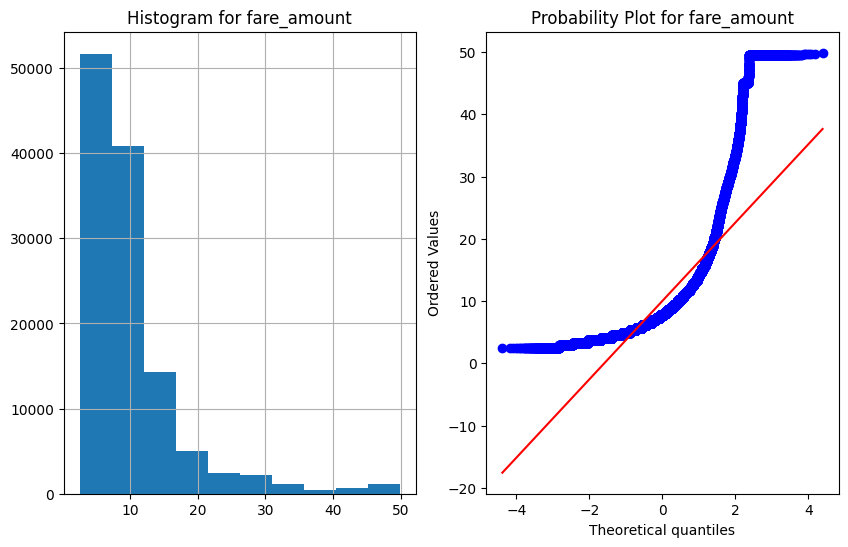

In [34]:
# Original fare_amount
plot_data(df,'fare_amount')

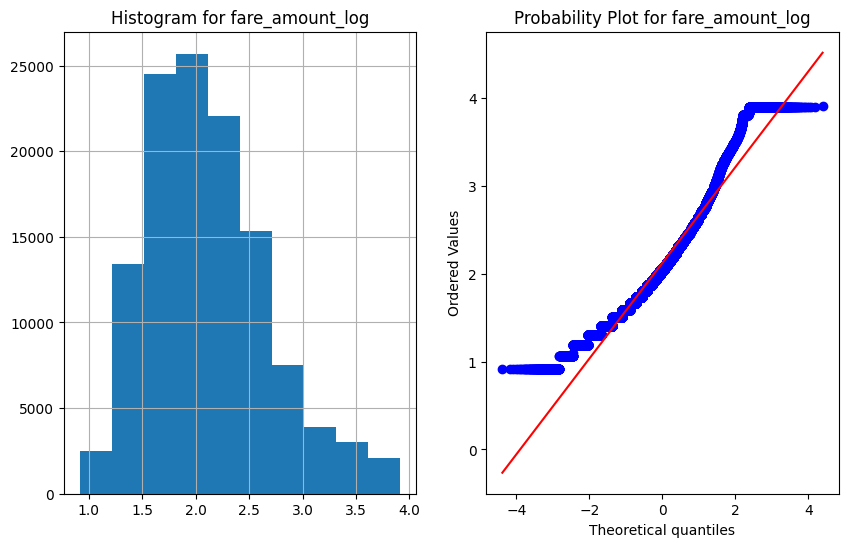

In [35]:
#  using log Transformation:
df['fare_amount_log'] = np.log(df['fare_amount'])
plot_data(df,'fare_amount_log')

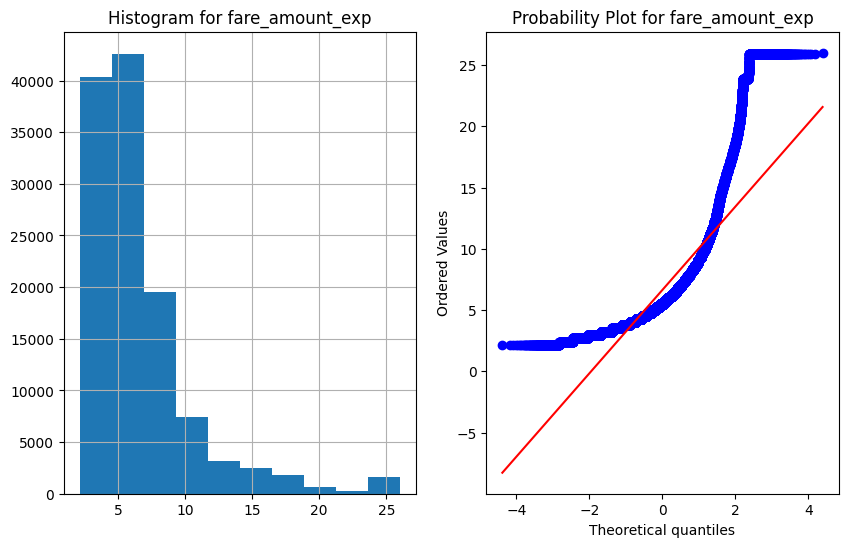

In [36]:
# Exponential Transformation:
df['fare_amount_exp']=df.fare_amount**(1/1.2)
plot_data(df,'fare_amount_exp')

In [37]:
# Checking skewness of original and Log fransformed column

In [38]:
df.fare_amount.skew()

2.7701835918701887

In [39]:
df.fare_amount_log.skew()

0.7901615612209989

<Axes: xlabel='fare_amount_log', ylabel='Density'>

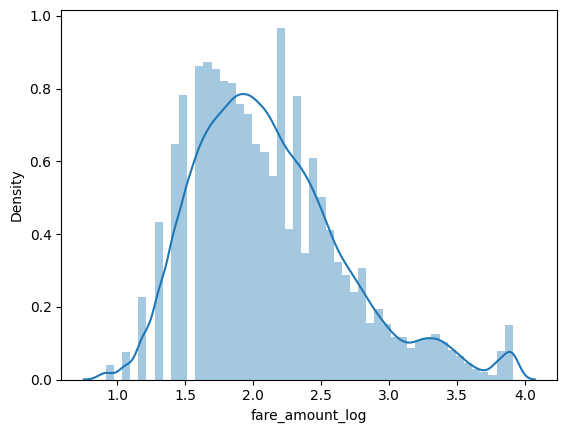

In [40]:
sns.distplot(df.fare_amount_log)

Observation:
* After trying couple of normalization techmique log transformation gives best output amoung them.

* The skewness is also reduced from 2.77 to 0.79.

* And the distribution is also came close Bell shape curve.

---




2.   distance



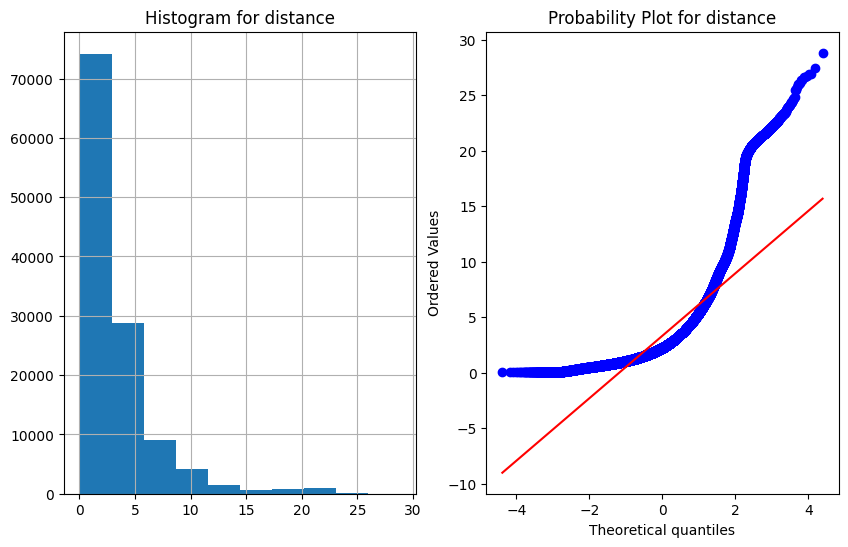

In [41]:
# Original data distance
plot_data(df,'distance')

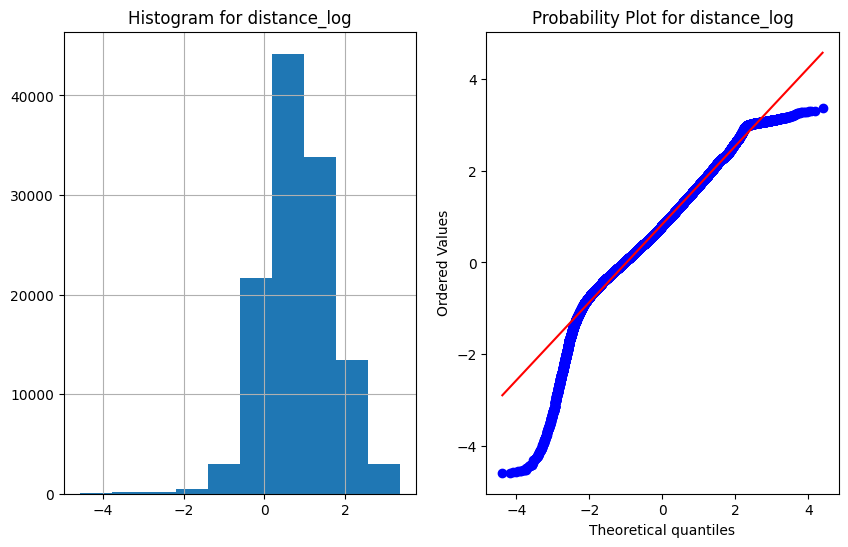

In [42]:
#  using log Transformation:
df['distance_log'] = np.log(df['distance'])
plot_data(df,'distance_log')

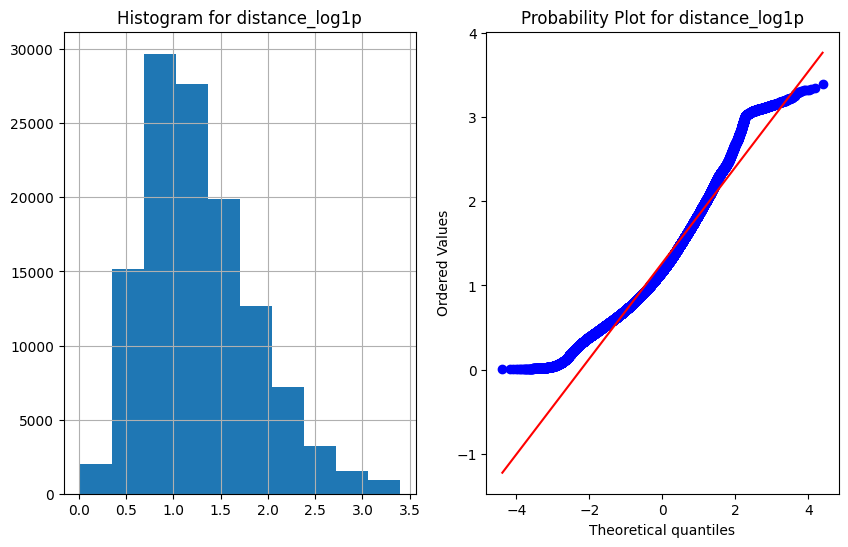

In [43]:
#  using log Transformation:
df['distance_log1p'] = np.log1p(df['distance'])
plot_data(df,'distance_log1p')

In [44]:
# Checking skewness of original and Log transformed column and log1p transformed column.

In [45]:
df.distance.skew()

2.7847731544592884

In [46]:
df.distance_log.skew()

-0.2060762255056554

In [47]:
df.distance_log1p.skew()

0.7491009320265519

<Axes: xlabel='distance_log1p', ylabel='Density'>

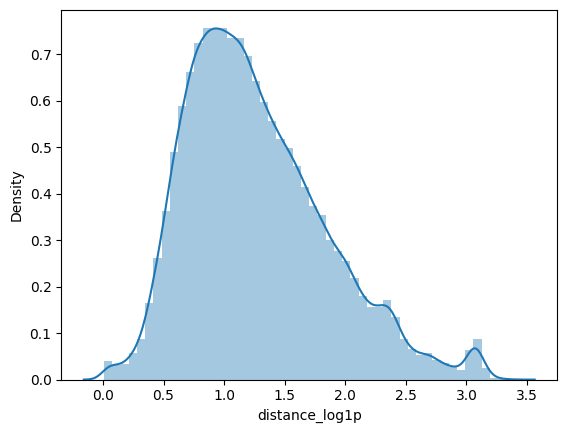

In [48]:
sns.distplot(df.distance_log1p)

Observation:

* After trying couple of normalization techmique log transformation data became left skewed,so we used log1p transformation output amoung them as it nulify negative values.

* The skewness is also reduced from 2.78 to 0.79.

* And the distribution is also came close Bell shape curve.



---


Now lets see Categorical values



1.  Fare class:




Text(0, 0.5, 'count')

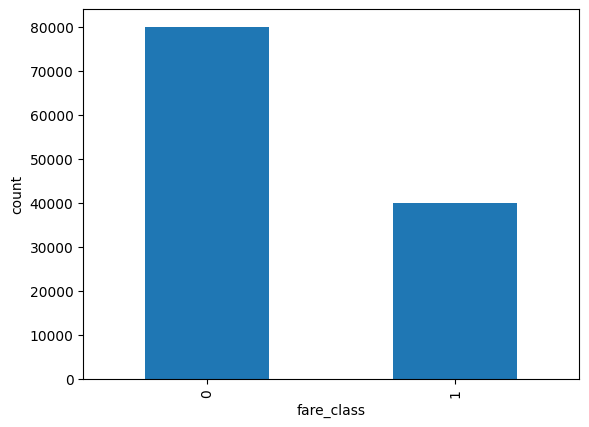

In [49]:
df['fare_class'].value_counts().plot(kind='bar')
plt.xlabel('fare_class')
plt.ylabel('count')

* So need to do any changes in fare_class column.

* There 66.6% of 0's and 33.3% of 1's


---

2.   Passenger_count

Text(0, 0.5, 'count')

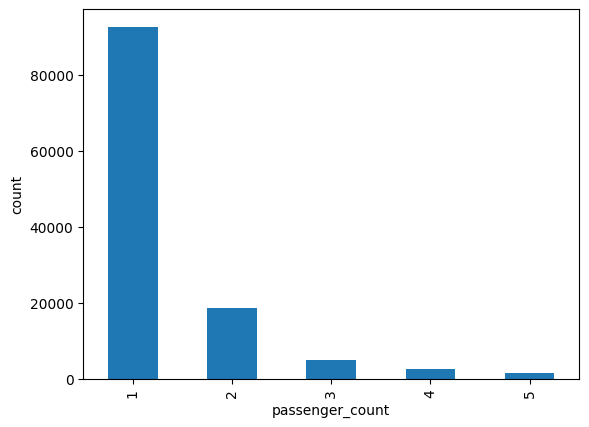

In [50]:
df['passenger_count'].value_counts().plot(kind='bar')
plt.xlabel('passenger_count')
plt.ylabel('count')

Lets merge two categories 4 and 5 as they are having less records and name it as 4+.


In [51]:
# Merge passenger_count categories 4 and 5 into a single category '4+'
df['passenger_count'] = df['passenger_count'].replace({4: '4+', 5: '4+'})

Text(0, 0.5, 'count')

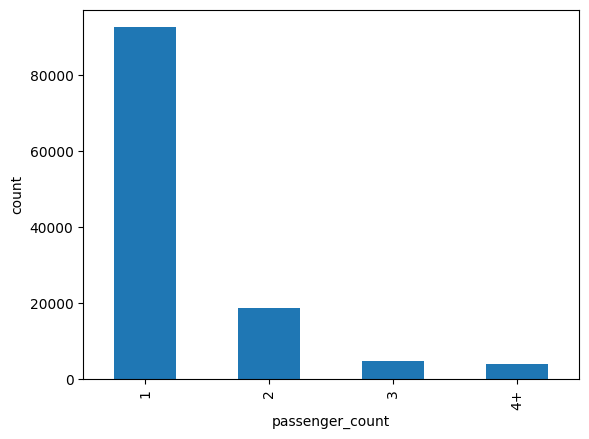

In [52]:
# lets see the vizualization again
df['passenger_count'].value_counts().plot(kind='bar')
plt.xlabel('passenger_count')
plt.ylabel('count')



---


3.   Hours

Text(0, 0.5, 'count')

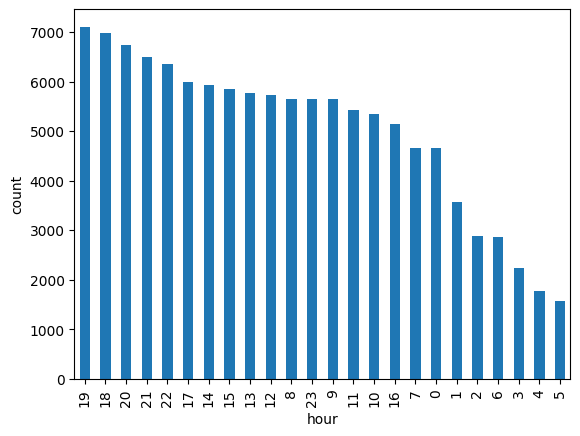

In [53]:
df['hour'].value_counts().plot(kind='bar')
plt.xlabel('hour')
plt.ylabel('count')

There are 24 categories which can be reduced/merged into type time zone of day.

In [54]:
# Define a function to map hours to categories
def categorize_hour(hour):
    if 0 <= hour < 6:
        return 'night_hours'
    elif 6 <= hour < 12:
        return 'morning_hours'
    elif 12 <= hour < 18:
        return 'afternoon_hours'
    else:
        return 'evening_hours'

df['hour'] = df['hour'].apply(categorize_hour)


Text(0, 0.5, 'count')

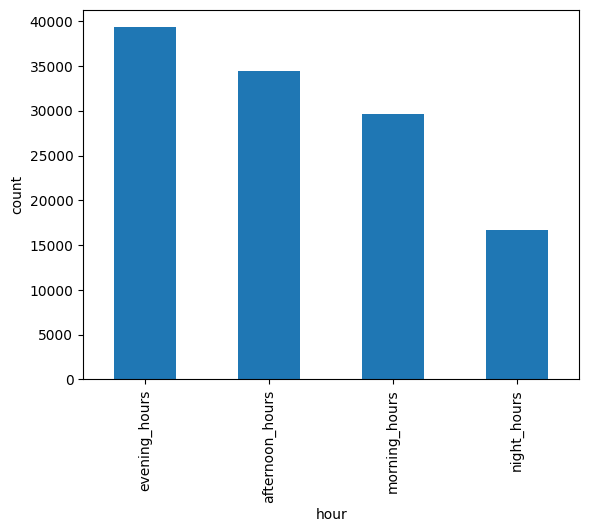

In [55]:
df['hour'].value_counts().plot(kind='bar')
plt.xlabel('hour')
plt.ylabel('count')



---


4.  day_type




Text(0, 0.5, 'count')

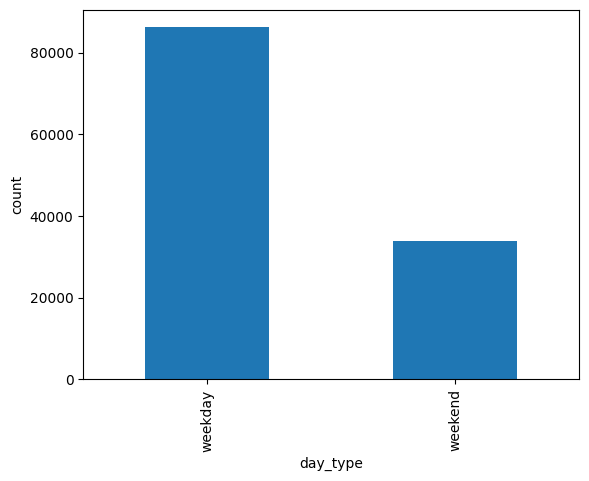

In [56]:
df['day_type'].value_counts().plot(kind='bar')
plt.xlabel('day_type')
plt.ylabel('count')



---


5. day_of_week

Text(0, 0.5, 'count')

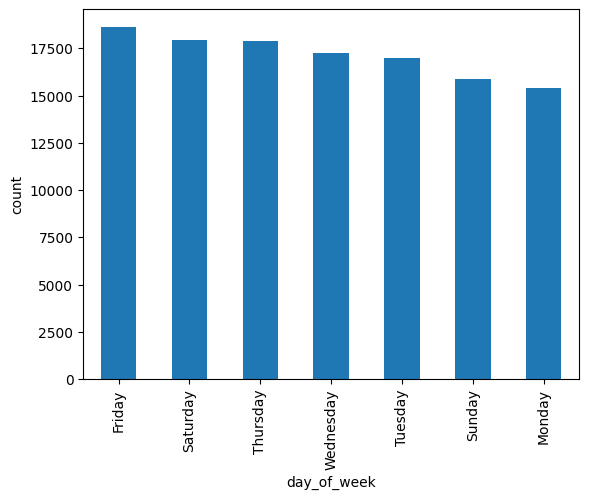

In [57]:
df['day_of_week'].value_counts().plot(kind='bar')
plt.xlabel('day_of_week')
plt.ylabel('count')

In [58]:
# Dropping the 'fare_amount','distance','fare_amount_exp','distance_log' column .
df = df.drop(['fare_amount','distance','fare_amount_exp','distance_log'], axis=1)



---


So this are the Final Columns

In [59]:
df.head()

,fare_class,passenger_count,hour,day_of_week,day_type,fare_amount_log,distance_log1p
0,0,1,morning_hours,Monday,weekday,1.871802,1.140135
1,0,1,afternoon_hours,Saturday,weekend,1.931521,0.873561
2,1,2,morning_hours,Saturday,weekend,2.312535,1.466024
3,0,1,evening_hours,Sunday,weekend,2.186051,1.053319
4,1,1,night_hours,Saturday,weekend,2.980619,2.110121


Correlation

In [60]:
correlation = df.corr()
correlation

,fare_class,fare_amount_log,distance_log1p
fare_class,1.000000,0.798197,0.726047
fare_amount_log,0.798197,1.000000,0.887139
distance_log1p,0.726047,0.887139,1.000000


<Axes: >

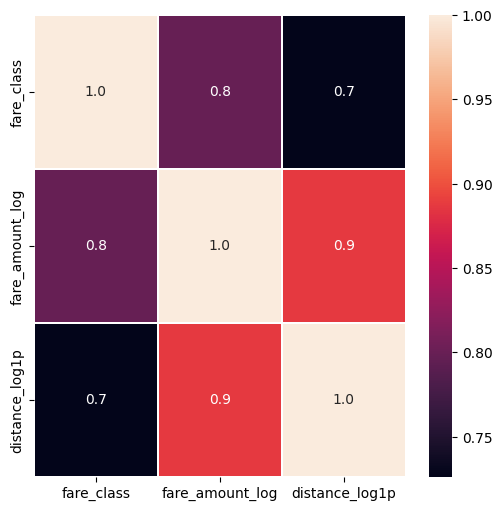

In [61]:
#correlation map
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt= '1.0001f',ax=ax)

Observation:


* The correlation between fare_class and fare_amount_log is positive. This means that as the fare class increases, the fare amount log also increases.

* The correlation between fare_class and distance_log1p is positive. This means that as the fare class increases, the distance_log1p also increases.

* The correlation between fare_amount_log and distance_log1p is positive. This means that as the fare amount log increases, the distance_log1p also increases.

Note:
* It is important to note that correlation does not imply causation. Just because two variables are correlated does not mean that one variable causes the other to change.



---


# Creating dummies for object columns

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_class       120000 non-null  int64  
 1   passenger_count  120000 non-null  object 
 2   hour             120000 non-null  object 
 3   day_of_week      120000 non-null  object 
 4   day_type         120000 non-null  object 
 5   fare_amount_log  120000 non-null  float64
 6   distance_log1p   120000 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.4+ MB


In [63]:
df = pd.get_dummies(df, columns=['passenger_count', 'hour', 'day_of_week', 'day_type'])

# Splitting the Data in Train and Test

In [64]:
# creating Dependant and independant variables
x = df.drop(['fare_amount_log'], axis=1)
y = df[['fare_amount_log']]

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [66]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(36000, 19)
(84000, 19)
(36000, 1)
(84000, 1)




---



# USING SK LEARN

Fitting the Linear Model.

In [67]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

In [68]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

def calculate_and_print_metrics(name, y_true, y_pred, x=None):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    if x is not None:
        k = x.shape[1]
        adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    else:
        adj_r2 = None
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"{name} Set Metrics:")
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R-squared:", r2)
    if adj_r2 is not None:
        print("Adjusted R-squared:", adj_r2)
    print("MAPE:", mape)
    print()

# Predictions on the training set
pred_train = linearregression.predict(x_train)

# Predictions on the test set
pred_test = linearregression.predict(x_test)

# Calculate and print metrics for the training set
calculate_and_print_metrics("Training", y_train, pred_train, x_train)

# Calculate and print metrics for the test set
calculate_and_print_metrics("Test", y_test, pred_test, x_test)


Training Set Metrics:
RMSE: 0.22426856692176925
MAE: 0.1609047940037361
R-squared: 0.8381394918379022
Adjusted R-squared: 0.8381028718134311
MAPE: 0.07950961378509452

Test Set Metrics:
RMSE: 0.2186156202728343
MAE: 0.1589010571268343
R-squared: 0.8449322618414988
Adjusted R-squared: 0.8448503750425824
MAPE: 0.07851858282984339



Observations:
*  Both RMSE and MAE are relatively low, indicating that the model's predictions are on average close to the actual values, with the test set having slightly better values.
* Both R-squared and Adjusted R-squared are high, indicating that the model explains a large proportion of the variance in the target variable (around 84%).
* MAPE is also low, indicating that the model's average percentage errors are small, suggesting good performance even for smaller values.


---




# USING STATS MODEL

In [70]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'x_train' and 'y_train' are DataFrames

# Convert x_train columns to numeric
x_train_numeric = x_train.apply(pd.to_numeric, errors='coerce')

# Add a constant to the independent variable matrix x
x_train_numeric = sm.add_constant(x_train_numeric)

# Fit the OLS model
ols_model = sm.OLS(y_train, x_train_numeric)

# Get the OLS results
ols_results = ols_model.fit()

# Print the summary
print(ols_results.summary())


                            OLS Regression Results                            
Dep. Variable:        fare_amount_log   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 3.106e+04
Date:                Thu, 07 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:13:01   Log-Likelihood:                 6380.5
No. Observations:               84000   AIC:                        -1.273e+04
Df Residuals:                   83985   BIC:                        -1.259e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.536e+

Observation:
* The R-squared value of 0.838 indicates that the model explains approximately 83.8% of the variance in the dependent variable (fare_amount_log), which is relatively high.

* The Adjusted R-squared value is the same as the R-squared value, suggesting that the additional variables in the model are not contributing significantly to the model's explanatory power.

* The F-statistic is very high (3.106e+04), indicating that the overall fit of the model is statistically significant.

Note:
* Overall, the model seems to have a good fit, but further analysis, such as checking for multicollinearity and examining the residuals, would be necessary to validate the model's assumptions and reliability.

# Test of Multicolinearity

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'x_train' is your DataFrame

# Convert all columns to numeric
x_train = x_train.apply(pd.to_numeric, errors='coerce')

# Calculate VIF for each feature after dropping 'atemp'
vif_series2 = pd.Series([variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])], index=x_train.columns)

# Sorting the series into descending
vif_series_sorted2 = vif_series2.sort_values(ascending=False)

# Print the VIF values after feature selection
print('VIF Series after feature selection:\n\n{}\n'.format(vif_series_sorted2))


VIF Series after feature selection:

hour_night_hours              inf
day_of_week_Friday            inf
day_type_weekday              inf
day_of_week_Wednesday         inf
day_of_week_Tuesday           inf
day_of_week_Thursday          inf
day_of_week_Sunday            inf
day_of_week_Saturday          inf
day_of_week_Monday            inf
day_type_weekend              inf
hour_morning_hours            inf
hour_evening_hours            inf
hour_afternoon_hours          inf
passenger_count_4+            inf
passenger_count_3             inf
passenger_count_2             inf
passenger_count_1             inf
distance_log1p           2.123852
fare_class               2.110440
dtype: float64



In [72]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train1 = x_train.drop('hour_night_hours', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(x_train1.values,i) for i in range(x_train1.shape[1])],index=x_train1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

fare_class               2.110440
distance_log1p           2.123842
passenger_count_1             inf
passenger_count_2             inf
passenger_count_3             inf
passenger_count_4+            inf
hour_afternoon_hours     2.251158
hour_evening_hours       2.324550
hour_morning_hours       2.192275
day_of_week_Friday            inf
day_of_week_Monday            inf
day_of_week_Saturday          inf
day_of_week_Sunday            inf
day_of_week_Thursday          inf
day_of_week_Tuesday           inf
day_of_week_Wednesday         inf
day_type_weekday              inf
day_type_weekend              inf
dtype: float64



In [73]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train2 = x_train1.drop('passenger_count_4+', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(x_train2.values,i) for i in range(x_train2.shape[1])],index=x_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

fare_class               2.110440
distance_log1p           2.123804
passenger_count_1        5.686881
passenger_count_2        4.886266
passenger_count_3        2.161199
hour_afternoon_hours     2.251158
hour_evening_hours       2.324550
hour_morning_hours       2.192275
day_of_week_Friday            inf
day_of_week_Monday            inf
day_of_week_Saturday          inf
day_of_week_Sunday            inf
day_of_week_Thursday          inf
day_of_week_Tuesday           inf
day_of_week_Wednesday         inf
day_type_weekday              inf
day_type_weekend              inf
dtype: float64



In [74]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train3 = x_train2.drop('day_of_week_Friday', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(x_train3.values,i) for i in range(x_train3.shape[1])],index=x_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

fare_class                2.110440
distance_log1p            2.123852
passenger_count_1         5.686881
passenger_count_2         4.886266
passenger_count_3         2.161199
hour_afternoon_hours      2.251158
hour_evening_hours        2.324550
hour_morning_hours        2.192275
day_of_week_Monday        1.599214
day_of_week_Saturday           inf
day_of_week_Sunday             inf
day_of_week_Thursday      1.673648
day_of_week_Tuesday       1.649326
day_of_week_Wednesday     1.653814
day_type_weekday         35.586015
day_type_weekend               inf
dtype: float64



In [75]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train4 = x_train3.drop('day_type_weekend', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(x_train4.values,i) for i in range(x_train4.shape[1])],index=x_train4.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

fare_class                2.110440
distance_log1p            2.123852
passenger_count_1         5.686881
passenger_count_2         4.886266
passenger_count_3         2.161199
hour_afternoon_hours      2.251158
hour_evening_hours        2.324550
hour_morning_hours        2.192275
day_of_week_Monday        1.599214
day_of_week_Saturday      7.102221
day_of_week_Sunday        6.472652
day_of_week_Thursday      1.673648
day_of_week_Tuesday       1.649326
day_of_week_Wednesday     1.653814
day_type_weekday         35.586015
dtype: float64



In [76]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train5 = x_train4.drop('day_type_weekday', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(x_train5.values,i) for i in range(x_train5.shape[1])],index=x_train5.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

fare_class                3.071134
distance_log1p           10.714242
passenger_count_1        10.317336
passenger_count_2         2.862219
passenger_count_3         1.477542
hour_afternoon_hours      2.794223
hour_evening_hours        3.053350
hour_morning_hours        2.616017
day_of_week_Monday        1.749113
day_of_week_Saturday      1.806674
day_of_week_Sunday        1.736491
day_of_week_Thursday      1.858778
day_of_week_Tuesday       1.823107
day_of_week_Wednesday     1.832054
dtype: float64



In [77]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train6 = x_train5.drop('passenger_count_1', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(x_train6.values,i) for i in range(x_train6.shape[1])],index=x_train6.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

fare_class               2.914214
distance_log1p           8.367043
passenger_count_2        1.201975
passenger_count_3        1.053382
hour_afternoon_hours     2.198791
hour_evening_hours       2.446647
hour_morning_hours       2.069679
day_of_week_Monday       1.616441
day_of_week_Saturday     1.628920
day_of_week_Sunday       1.562091
day_of_week_Thursday     1.694127
day_of_week_Tuesday      1.672463
day_of_week_Wednesday    1.670344
dtype: float64



In [78]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train7 = x_train6.drop('distance_log1p', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(x_train7.values,i) for i in range(x_train7.shape[1])],index=x_train7.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

fare_class               1.427999
passenger_count_2        1.195198
passenger_count_3        1.051541
hour_afternoon_hours     1.959067
hour_evening_hours       2.093739
hour_morning_hours       1.808232
day_of_week_Monday       1.480021
day_of_week_Saturday     1.458830
day_of_week_Sunday       1.365384
day_of_week_Thursday     1.551758
day_of_week_Tuesday      1.536639
day_of_week_Wednesday    1.529693
dtype: float64



In [79]:
olsmod3 = sm.OLS(y_train, x_train7)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                                 OLS Regression Results                                
Dep. Variable:        fare_amount_log   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                          9.109e+04
Date:                Thu, 07 Mar 2024   Prob (F-statistic):                        0.00
Time:                        16:13:22   Log-Likelihood:                         -74448.
No. Observations:               84000   AIC:                                  1.489e+05
Df Residuals:                   83988   BIC:                                  1.490e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

Observation:
* The R-squared value of 0.929 indicates that the model explains approximately 92.9% of the variance in the dependent variable (fare_amount_log), which is quite high.

* The Adjusted R-squared value is the same as the R-squared value, suggesting that the additional variables in the model are not contributing significantly to the model's explanatory power.

* The F-statistic is very high (9.109e+04), indicating that the overall fit of the model is statistically significant.



---
# Checking the Linear Regression Assumptions

* Linearity of variables

* Normality of error terms

* Homoscedasticity

* Independence of errors from predictor variables


In [80]:
residual=olsres3.resid
fitted=olsres3.fittedvalues #predicted values

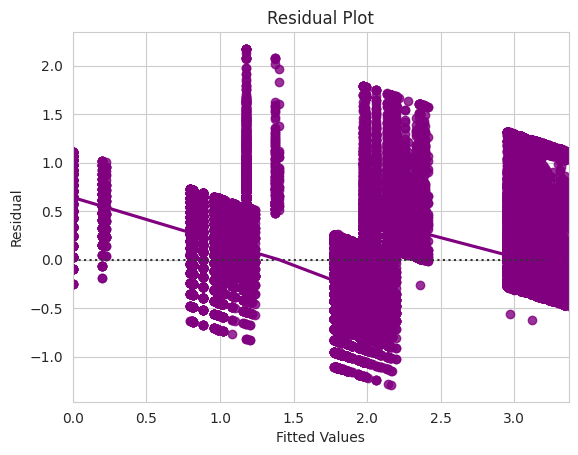

In [81]:
sns.set_style("whitegrid")
sns.residplot(x=fitted, y=residual, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

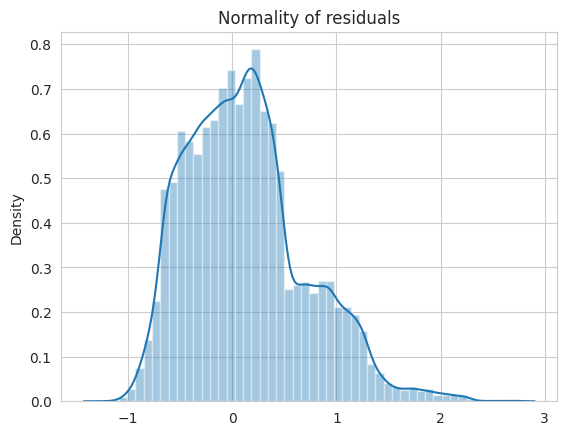

In [82]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

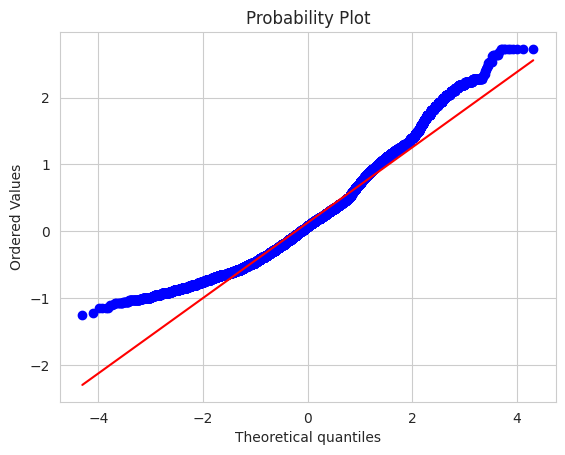

In [83]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [84]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9683024883270264, pvalue=0.0)

In [85]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, x_train7)
lzip(name, test)

[('F statistic', 1.0067620622550686), ('p-value', 0.24494947964115976)]

Checking the performance on train and test

In [86]:
x_test_final = x_test[x_train7.columns]

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
sklmodel_train_perf = model_performance_regression(olsres3, x_train7, y_train)
sklmodel_train_perf

Training Performance



In [1]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsres3, x_test_final, y_test)
olsmodel_test_perf

Test Performance



NameError: name 'model_performance_regression' is not defined